## Problem 1: Quadratic Formula

In [32]:
import numpy as np

def quadratic_solutions(a, b, c):
    x_1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a) 
    x_2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a) ## better because of a large numerator in this case
    x_3 = (2*c / (-b - np.sqrt(b**2 - 4*a*c))) ## better because of a large numerator in this case
    x_4 = (2*c / (-b + np.sqrt(b**2 - 4*a*c)))
    if b > 0:
        return(x_2, x_3)
    else: 
        return(x_1, x_4)
print(quadratic_solutions(.001, 1000, .001)) ## not finished: I need a relationship between all three variables.

(-999999.999999, -1.000000000001e-06)


In [30]:
def quadratic_solutions(a, b, c):
    x_1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    x_2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    x_3 = (2*c / (-b - np.sqrt(b**2 - 4*a*c)))
    x_4 = (2*c / (-b + np.sqrt(b**2 - 4*a*c)))
    return(x_1, x_2, x_3, x_4)
print(quadratic_solutions(.001, 1, .001))

(-0.001000001000006634, -999.9989999989999, -0.001000001000002, -999.998999994366)


## Problem 2: Simpson's rule

In [35]:
def f(x):
    return(x**4 - 2*x + 1)

def simpsons_rule(a, b, N):
    h = (b - a)/N
    s = (f(a) + f(b))
    s_odd = 0.0
    s_even = 0.0
    for k in range(1, N, 2):
        s_odd += f(a + k*h)
    for k in range(2, N, 2):
        s_even += f(a + k * h)
    return(1/3 * h * (s + 4 * s_odd + 2 * s_even))
for N in range(1, 4):
    print(simpsons_rule(0, 2, 10**N))

4.400426666666667
4.400000042666667
4.400000000004267


## Problem 3:  Heat capacity of a solid

Text(0, 0.5, '$Heat Capacity$')

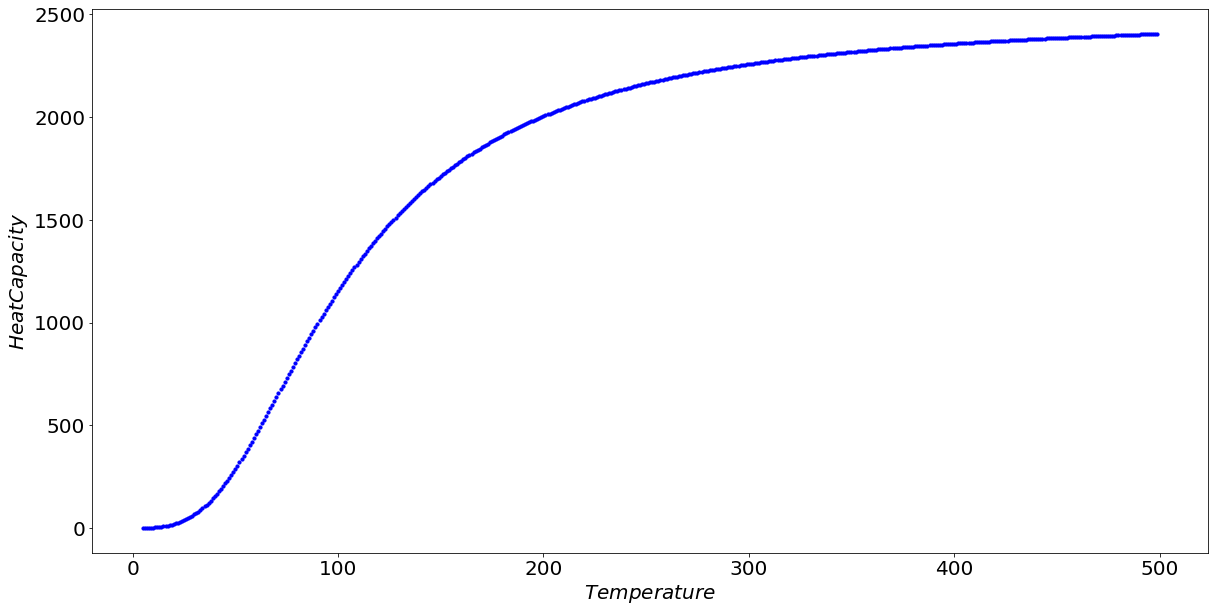

In [55]:
import numpy as np
from matplotlib import pyplot as plt

def cv(T):
    rho = 6.022 * 10**28 / (100)**3 ## in units of 1/cm^(-3)
    V = 1000 ## in units of cm^3
    Theta_D = 428 ## in units of Kelvin
    b_const = 1.380649 * 10**(-23) ## in units of m^2(kg)/(s^2*K)
    coefficient = 9 * V * rho * b_const * (T/Theta_D)**3
    
    def f(x): 
        if x == 0:
            return(0)
        else:
            return(x**4 * np.exp(x) / (np.exp(x) - 1)**2)

    N = 1000
    a = 0.0
    b = Theta_D / T
    h = (b-a)/N

    s = 0.5*f(a) + 0.5*f(b)
    for k in range(1, N):
        s += f(a + k * h)

    return(coefficient * h*s)

dude = open('cv.data.txt', 'w')

for T in range(5, 500):
    dude.write(str(T) + ' ' + str(cv(T)) + '\n' )
dude.close()

data = np.genfromtxt("cv.data.txt")
Temp = data[:,0]
heat_capacity = data[:,1] 

fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(Temp, heat_capacity, s = 10, c='b')

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
        
ax1.set_xlabel("$Temperature$",size=20)  
ax1.set_ylabel("$Heat Capacity$",size=20)

In [27]:
def f(x):
        return(x**4 * np.exp(x) / ((np.exp(x) - 1)**2))

N = 10
a = 0.0
b = 1.0
h = (b-a) / N

s = 0.5*f(b)
for k in range(1, N):
    s += f(a + k * h)
print(s)

3.1865292714702345


In [18]:
def f(x):
        return(x**4 * np.exp(x) / ((np.exp(x) - 1)**2))
f(3.83)

4.881032062584229

In [39]:
def f(x): 
    if x == 0:
        return(0)
    else:
        return(x**4 * np.exp(x) / (np.exp(x) - 1)**2)

N = 100
a = 0.0
b = 428/2
h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)
for k in range(1, N):
    s += f(a + k * h)
print(h*s)

25.975538469998508
